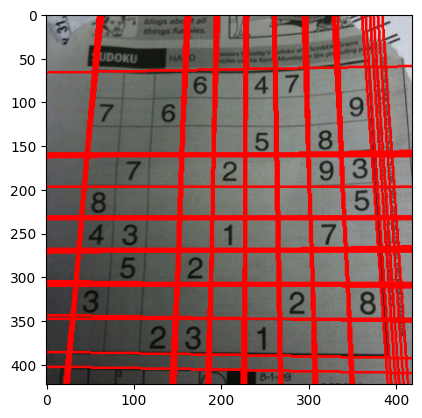

In [5]:
# Hough transform

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("D:/test.computer_vision/l2/img/sudoku.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edge = cv.Canny(gray, 50, 150)
lines = cv.HoughLines(edge, 1, np.pi/180, 150)          # در قطبی مقدار row 1 و تتا pi/180 هستش
for line in lines:
    row, teta = line[0]
    a = np.cos(teta)
    b = np.sin(teta)
    x0 = a*row
    y0 = b*row
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img, (x1,y1), (x2,y2), (0,0,255), 2)
plt.imshow(img[...,::-1])

Text(0.5, 1.0, 'line')

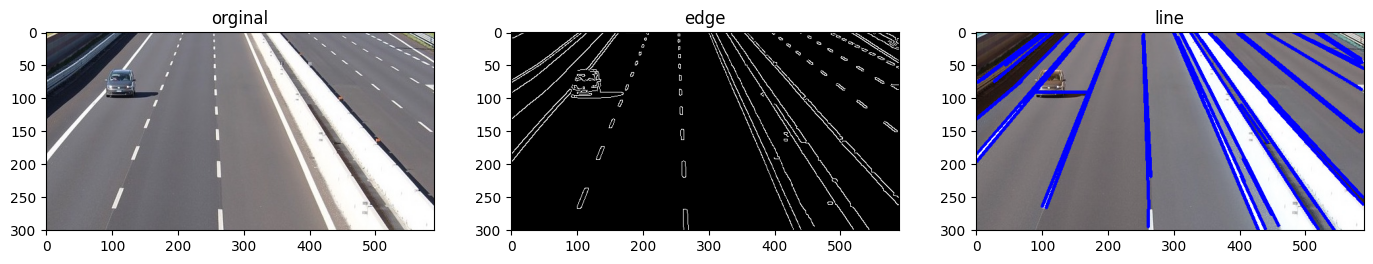

In [8]:
img = cv.imread("D:/test.computer_vision/l2/img/highway-lanes.jpg", cv.IMREAD_COLOR)
copy_img = img.copy()
blur = cv.GaussianBlur(img, (5,5), 0)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)
edg = cv.Canny(gray, 50, 200)
lines = cv.HoughLinesP(edg, 1, np.pi/180, 50, minLineLength=20, maxLineGap=50)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(copy_img, (x1,y1), (x2,y2), (0,0,255), 3)

plt.figure(figsize=[17,8])
plt.subplot(131); plt.imshow(img[...,::-1]); plt.title('orginal')
plt.subplot(132); plt.imshow(edg, cmap='gray'); plt.title('edge')
plt.subplot(133); plt.imshow(copy_img, cmap='gray'); plt.title('line')



Text(0.5, 1.0, 'binary')

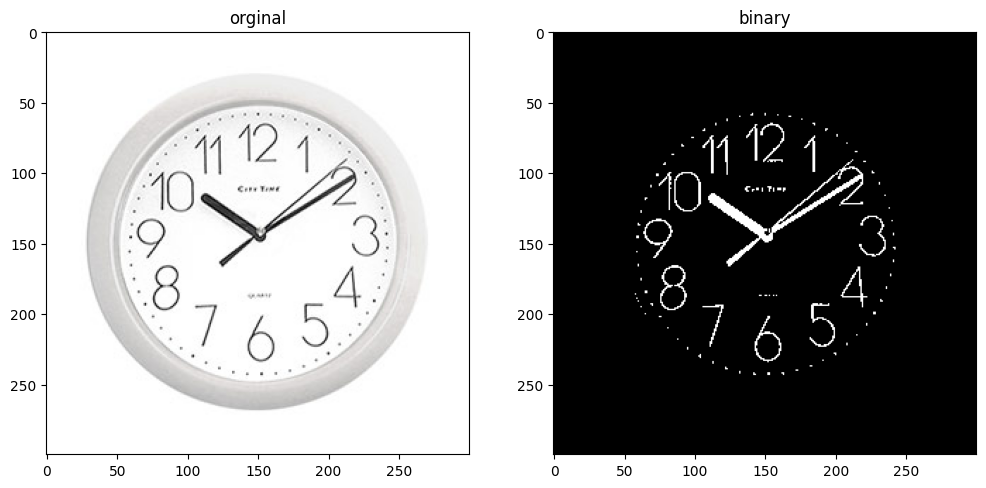

In [9]:
img = cv.imread("D:/test.computer_vision/l2/img/clock.jpg")

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

_, binary = cv.threshold(gray, 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.figure(figsize=[12,7])
plt.subplot(121); plt.imshow(img[...,::-1]); plt.title('orginal')
plt.subplot(122); plt.imshow(binary, cmap='gray'); plt.title('binary')

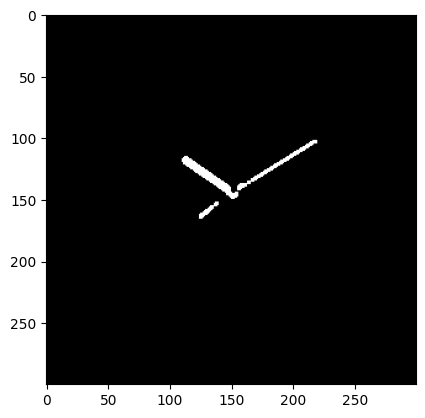

In [10]:
structureingelement = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
opening = cv.morphologyEx(binary, cv.MORPH_OPEN, structureingelement)
plt.imshow(opening, cmap='gray')

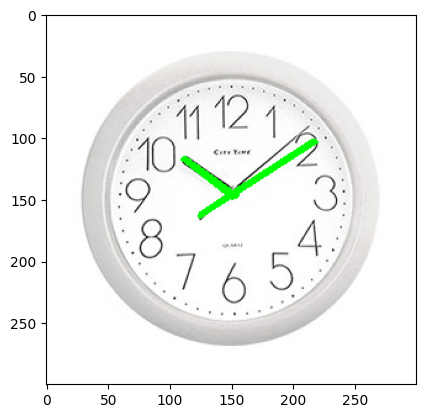

In [11]:
linethresh = 50
minlinelength = 20
maxlingap = 100

lines = cv.HoughLinesP(opening, 1, np.pi/180, linethresh, None, minlinelength, maxlingap)

X1 = []
X2 = []
Y1 = []
Y2 = []

drawimg = img.copy()

for [line] in lines:
    x1 = line[0]
    y1 = line[1]
    X1.append(x1)
    Y1.append(y1)

    x2 = line[2]
    y2 = line[3]
    X2.append(x2)
    Y2.append(y2)

    cv.line(drawimg, (x1,y1), (x2,y2), (0,255,0), 2)
    cv.imshow('lines', drawimg)
    cv.waitKey(0)
cv.destroyAllWindows()
plt.imshow(drawimg[...,::-1], cmap='gray')

In [12]:
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=2)

X1 = np.array(X1).reshape(-1,1)
Y1 = np.array(Y1).reshape(-1,1)
X2 = np.array(X2).reshape(-1,1)
Y2 = np.array(Y2).reshape(-1,1)

points = np.hstack((X1, Y1, X2, Y2))
print(points.shape)

Kmeans.fit(points)
result = np.array(Kmeans.cluster_centers_, dtype='uint8')
print(result)

(6, 4)
[[111 116 153 148]
 [124 162 217 102]]


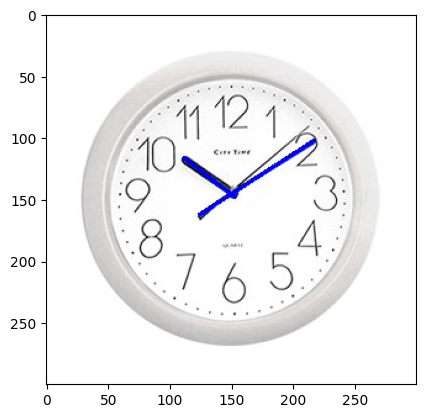

In [16]:
drawimg = img.copy()

for i in range(2):
    x1 = int(result[i][0])
    y1 = int(result[i][1])
    x2 = int(result[i][2])
    y2 = int(result[i][3])

    cv.line(drawimg, (x1,y1), (x2,y2), (255,0,0), 2)

plt.imshow(drawimg[...,::-1])

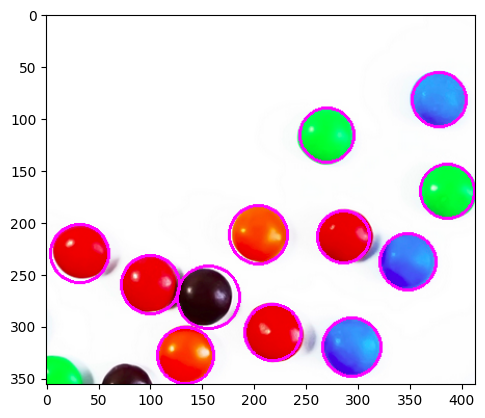

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("D:/test.computer_vision/l2/img/smarties.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 5)

rows = gray.shape[0]
circle = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows/8, param1=100, param2=30)

if circle is not None:
    circle = np.uint16(np.around(circle))
    for c in circle[0, :]:
        center_x, center_y, radius = c
        center = (center_x, center_y)
        cv.circle(img, center, radius, (255,0,255), 2)
plt.imshow(img[...,::-1])

number of coins:  7


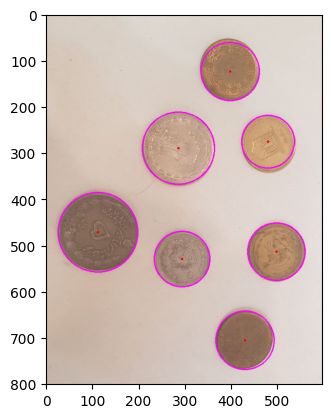

In [6]:
img = cv.imread("D:/test.computer_vision/l2/img/old-iranian-coins.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 5)

rows = gray.shape[0]
circle = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows/8, param1=100, param2=30)

if circle is not None:
    print('number of coins: ', len(circle[0, :]))
    circle = np.uint16(np.around(circle))
    for c in circle[0, :]:
        center_x, center_y, radius = c
        center = (center_x, center_y)
        cv.circle(img, center, 1, (0,0,255), 2)
        cv.circle(img, center, radius, (255,0,255), 2)
plt.imshow(img[...,::-1])

number of coins:  24


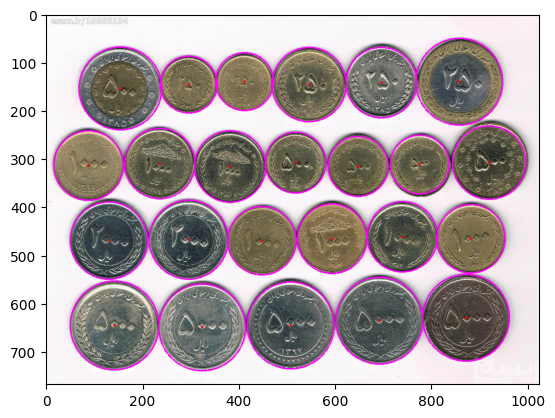

In [9]:
img = cv.imread("D:/test.computer_vision/l2/img/iranian-coin.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 5)

rows = gray.shape[0]
circle = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows/8, param1=100, param2=30, minRadius=50, maxRadius=100)

if circle is not None:
    print('number of coins: ', len(circle[0, :]))
    circle = np.uint16(np.around(circle))
    for c in circle[0, :]:
        center_x, center_y, radius = c
        center = (center_x, center_y)
        cv.circle(img, center, 1, (0,0,255), 2)
        cv.circle(img, center, radius, (255,0,255), 2)
plt.imshow(img[...,::-1])

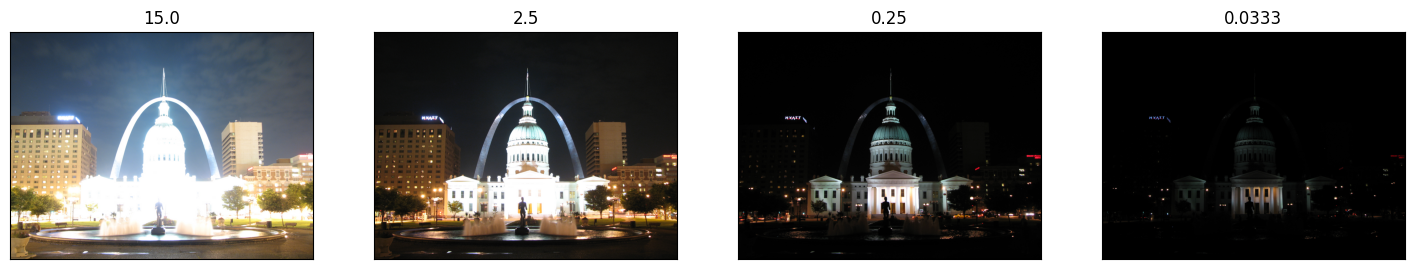

In [10]:
img = cv.imread("D:/test.computer_vision/l2/img/img_0.25.jpg")
img_fn = ["D:/test.computer_vision/l2/img/img_15.jpg", "D:/test.computer_vision/l2/img/img_2.5.jpg", "D:/test.computer_vision/l2/img/img_0.25.jpg", "D:/test.computer_vision/l2/img/img_0.033.jpg"]
img_list = [cv.imread(fn) for fn in img_fn]
exp_time = np.array([15,2.5,0.25,0.0333], dtype=np.float32)
plt.figure(figsize=[18,4])
for i, (image, exposure) in enumerate(zip(img_list, exp_time)):
    plt.subplot(1,4,i+1); plt.imshow(image[...,::-1]); plt.title(exposure); plt.xticks([]); plt.yticks([])

In [11]:
merge_mertens = cv.createMergeMertens()
res_mertens = merge_mertens.process(img_list)

In [14]:
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')         # convert to 8 bit

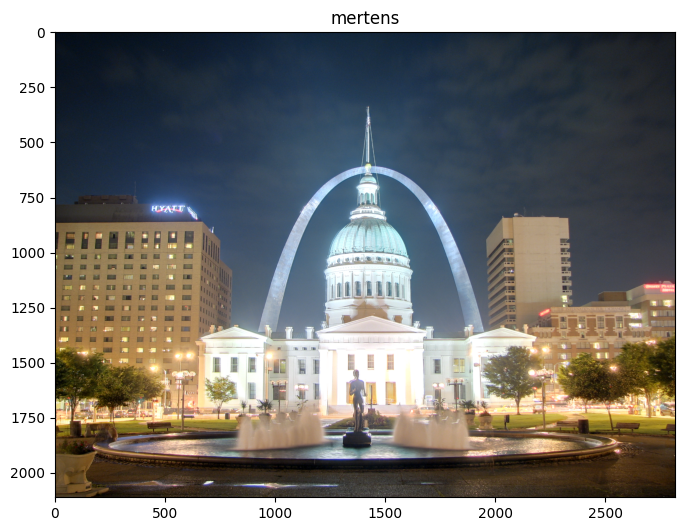

In [15]:
plt.figure(figsize=[8,8])
plt.imshow(res_mertens_8bit[...,::-1]); plt.title('mertens'); 

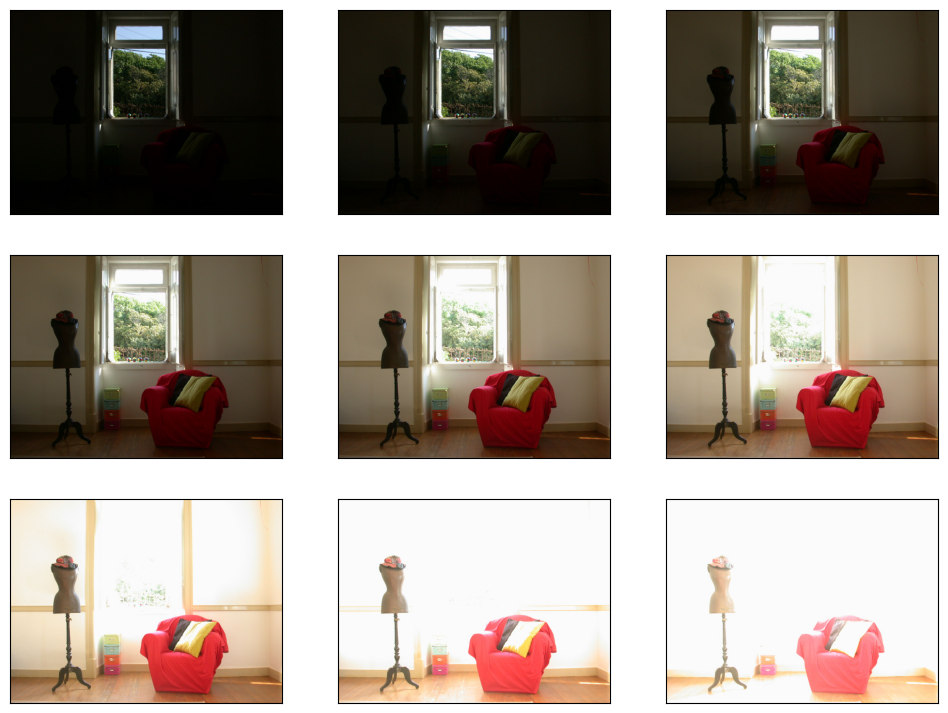

In [16]:
import glob
img = glob.glob('D:/test.computer_vision/l2/img/1280px-HDRI_Sample_Scene_Window_-*.jpg')
img_list = [cv.imread(fn) for fn in img]

plt.figure(figsize=[12,9])
for i, imag in enumerate(img_list):
    plt.subplot(3,3,i+1); plt.imshow(imag[...,::-1]); plt.xticks([]); plt.yticks([])

Text(0.5, 1.0, 'mertens')

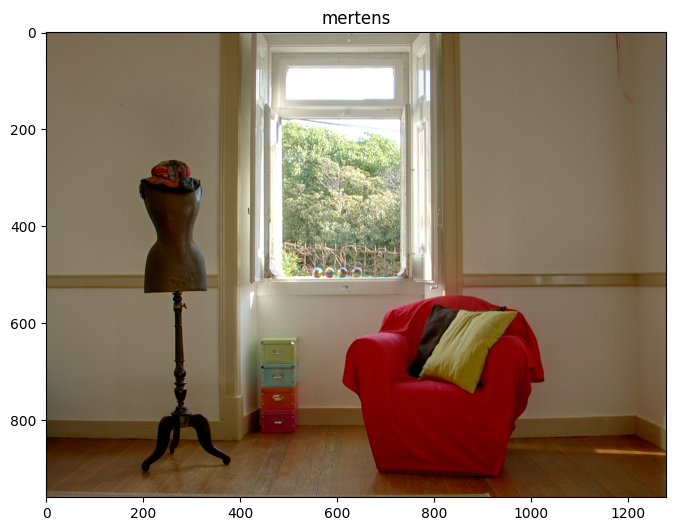

In [17]:
merge_mertens = cv.createMergeMertens()
res_mertens = merge_mertens.process(img_list)
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
plt.figure(figsize=(8,8))
plt.imshow(res_mertens_8bit[...,::-1]); plt.title('mertens')

In [19]:
def combine_2_color_img(img1, img2):
    foreground, background = img1.copy(), img2.copy()
    foreground_h = foreground.shape[0]
    foreground_w = foreground.shape[1]
    alpha = 0.5

    blended_portion = cv.addWeighted(foreground, alpha, background[:foreground_h, :foreground_w, :], 1-alpha, 0, background)
    background[:foreground_h, :foreground_w,:] = blended_portion
    return background

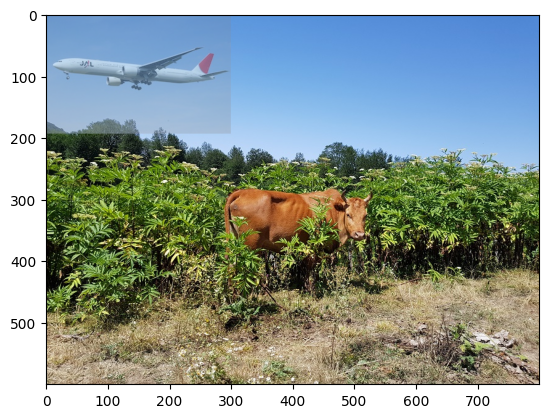

In [20]:
src = cv.imread("D:/test.computer_vision/l2/img/airplane.jpg")
dst = cv.imread("D:/test.computer_vision/l2/img/input.jpg")
result = combine_2_color_img(src, dst)
plt.imshow(result[...,::-1])

Text(0.5, 1.0, 'mask')

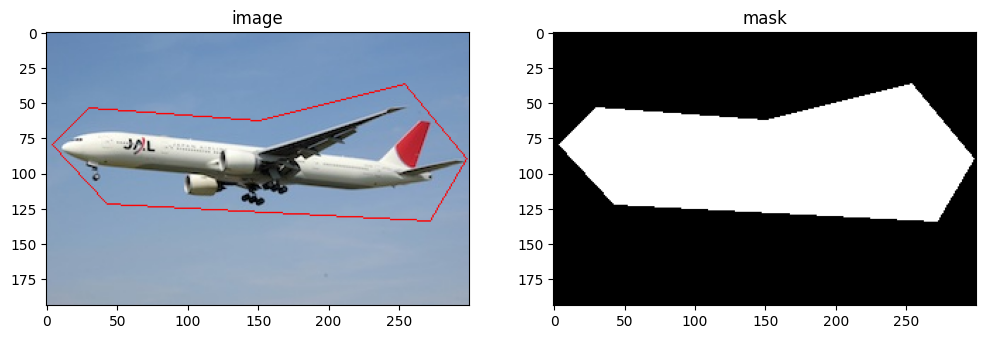

In [ ]:
src = cv.imread('D:/test.computer_vision/l2/img/airplane.jpg')
poly = np.array([[4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122]], np.int32)
cv.polylines(src, [poly], 1, (0,0,255))

src_mask = np.zeros(src.shape, src.dtype)
cv.fillPoly(src_mask, [poly], (255,255,255))

plt.figure(figsize=[12,7])
plt.subplot(121); plt.imshow(src[...,::-1]); plt.title('image')
plt.subplot(122); plt.imshow(src_mask[...,::-1]); plt.title('mask')

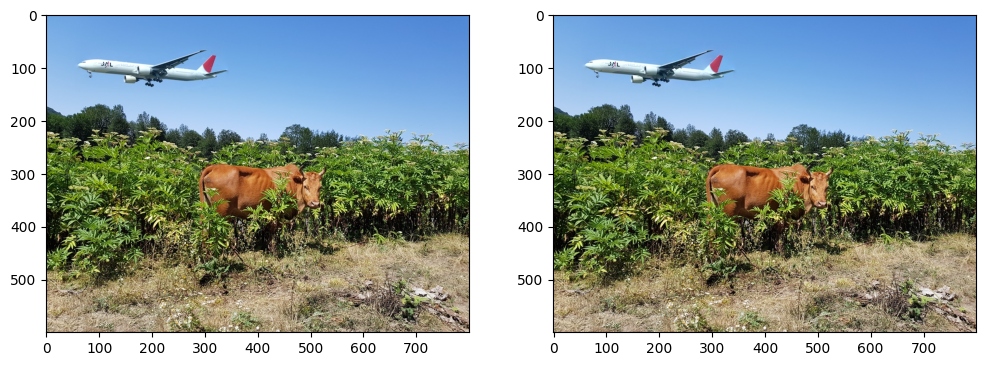

In [23]:
src = cv.imread("D:/test.computer_vision/l2/img/airplane.jpg")
dst = cv.imread("D:/test.computer_vision/l2/img/input.jpg")

src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([[4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122]], np.int32)
cv.fillPoly(src_mask, [poly], (255,255,255))

center = (200,100)

output1 = cv.seamlessClone(src, dst, src_mask, center, cv.NORMAL_CLONE)
output2 = cv.seamlessClone(src, dst, src_mask, center, cv.MIXED_CLONE)

plt.figure(figsize=(12,7))
plt.subplot(121); plt.imshow(output1[...,::-1])
plt.subplot(122); plt.imshow(output2[...,::-1])

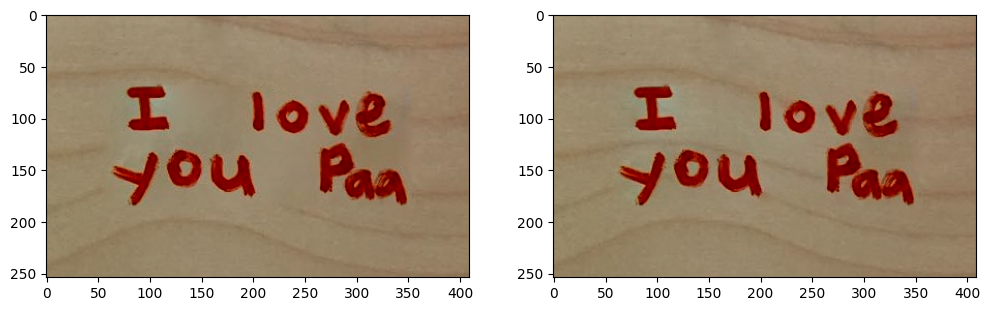

In [26]:
src = cv.imread("D:/test.computer_vision/l2/img/wood-texture.jpg")
dst = cv.imread("D:/test.computer_vision/l2/img/iloveyouticket.jpg")

mask = 255*np.ones(dst.shape, dst.dtype)
w, h, channels = src.shape
center = (int(h/2), int(w/2))

output1 = cv.seamlessClone(dst, src, mask, center, cv.NORMAL_CLONE)
output2 = cv.seamlessClone(dst, src, mask, center, cv.MIXED_CLONE)

plt.figure(figsize=(12,7))
plt.subplot(121); plt.imshow(output1[...,::-1])
plt.subplot(122); plt.imshow(output2[...,::-1])

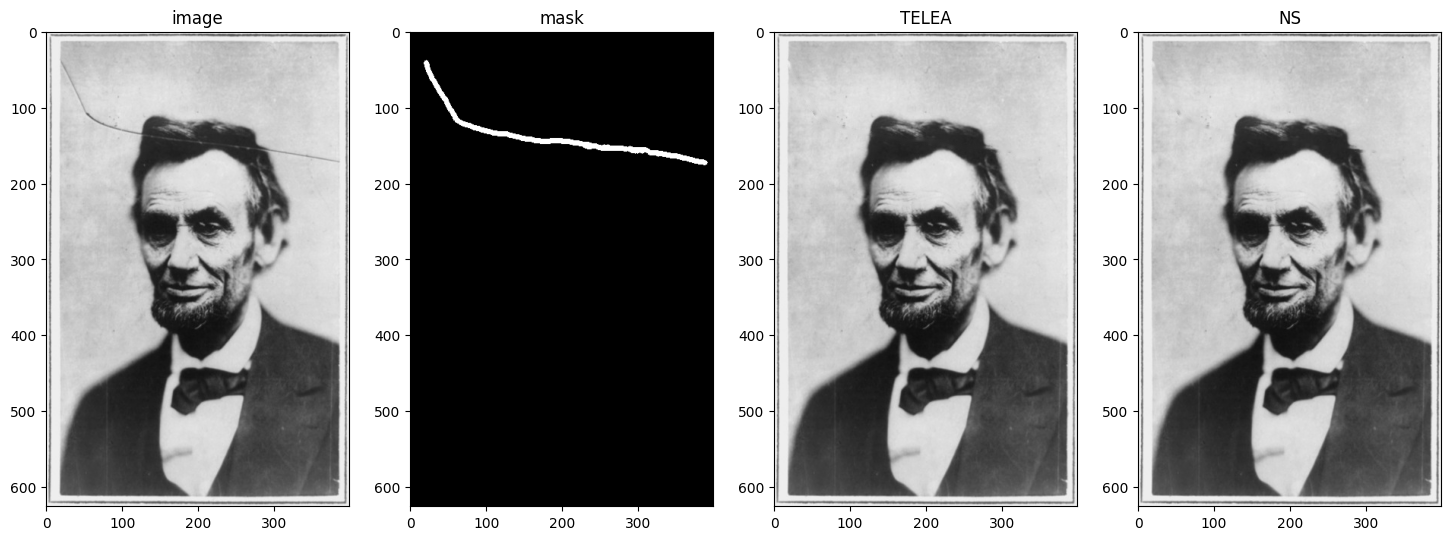

In [27]:
image = cv.imread("D:/test.computer_vision/l2/img/Lincoln.jpg")
mask = cv.imread("D:/test.computer_vision/l2/img/inpaintMask.png",0) #single channel

res_telea = cv.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv.INPAINT_TELEA)
res_ns = cv.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv.INPAINT_NS)


plt.figure(figsize=[18,7])
plt.subplot(141);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(142);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(143);plt.imshow(res_telea[...,::-1]);plt.title("TELEA");
plt.subplot(144);plt.imshow(res_ns[...,::-1]);plt.title("NS");

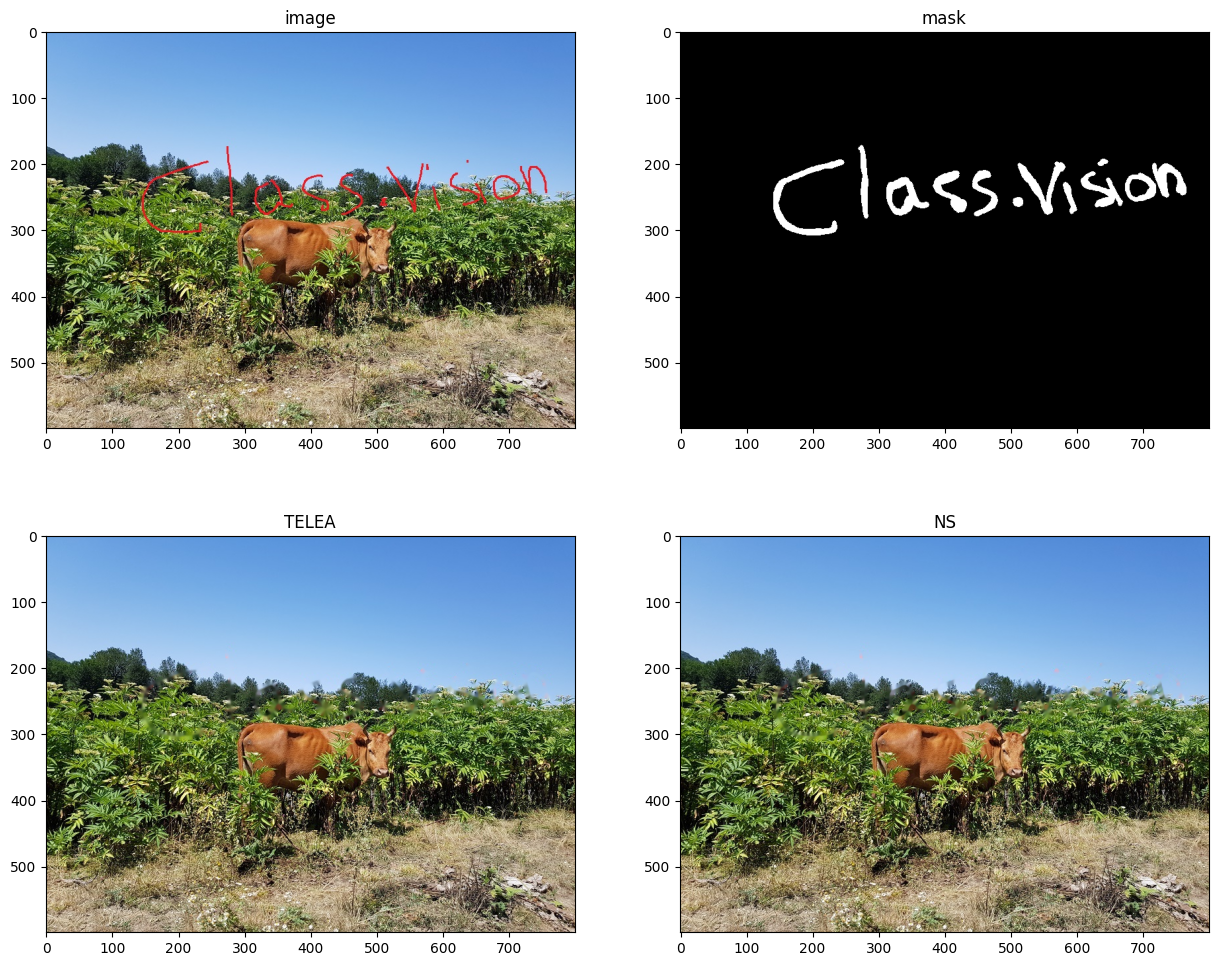

In [28]:
image = cv.imread("D:/test.computer_vision/l2/img/input-inpaint.jpg")
mask = cv.imread("D:/test.computer_vision/l2/img/input_inpaintMask.png",0) #single channel

res_telea = cv.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv.INPAINT_TELEA)
res_ns = cv.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv.INPAINT_NS)


plt.figure(figsize=[15,12])
plt.subplot(221);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(222);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(223);plt.imshow(res_telea[...,::-1]);plt.title("TELEA");
plt.subplot(224);plt.imshow(res_ns[...,::-1]);plt.title("NS");

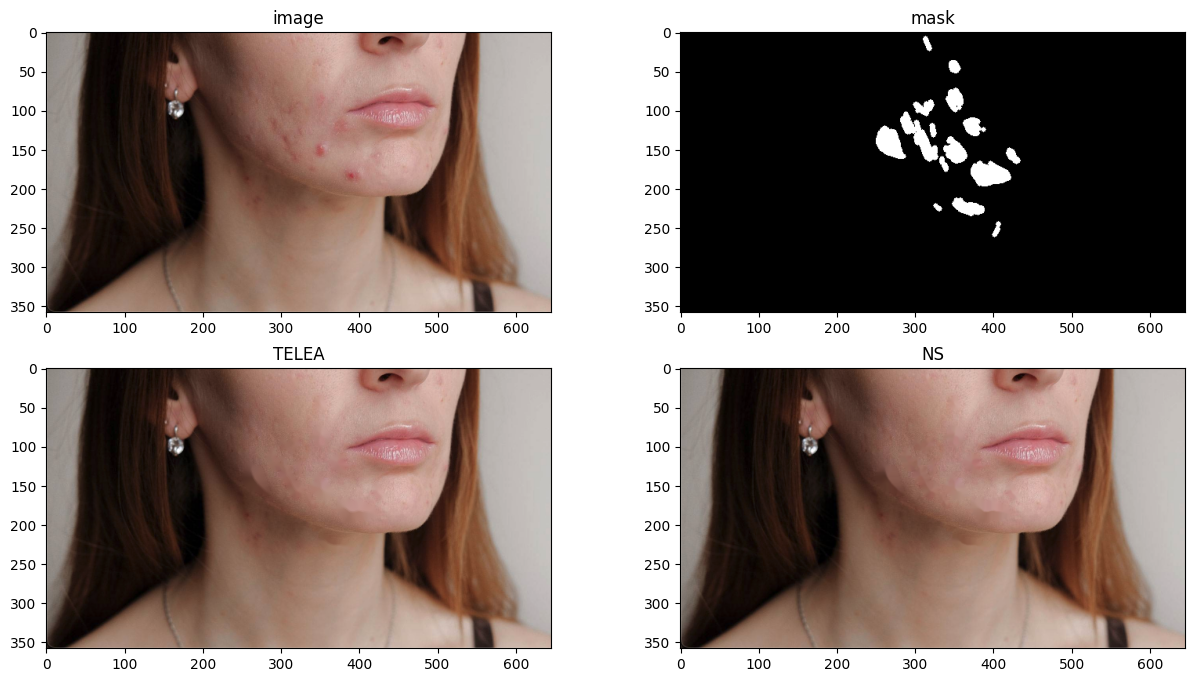

In [29]:
image = cv.imread("D:/test.computer_vision/l2/img/blemish.png")
mask = cv.imread("D:/test.computer_vision/l2/img/blemishMask.png",0) #single channel

res_telea = cv.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv.INPAINT_TELEA)
res_ns = cv.inpaint(src=image, inpaintMask=mask, inpaintRadius=3, flags=cv.INPAINT_NS)


plt.figure(figsize=[15,8])
plt.subplot(221);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(222);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(223);plt.imshow(res_telea[...,::-1]);plt.title("TELEA");
plt.subplot(224);plt.imshow(res_ns[...,::-1]);plt.title("NS");

In [30]:
# OpenCV Utility Class for Mouse Handling
class Sketcher:
    def __init__(self, windowname, dests, colors_func):
        self.prev_pt = None
        self.windowname = windowname
        self.dests = dests
        self.colors_func = colors_func
        self.dirty = False
        self.show()
        cv.setMouseCallback(self.windowname, self.on_mouse)

    def show(self):
        cv.imshow(self.windowname, self.dests[0])
        cv.imshow(self.windowname + ": mask", self.dests[1])

    # onMouse function for Mouse Handling
    def on_mouse(self, event, x, y, flags, param):
        pt = (x, y)
        if event == cv.EVENT_LBUTTONDOWN:
            self.prev_pt = pt
        elif event == cv.EVENT_LBUTTONUP:
            self.prev_pt = None

        if self.prev_pt and flags & cv.EVENT_FLAG_LBUTTON:
            for dst, color in zip(self.dests, self.colors_func()):
                cv.line(dst, self.prev_pt, pt, color, 5)
            self.dirty = True
            self.prev_pt = pt
            self.show()


# Read image in color mode
img = cv.imread("D:/test.computer_vision/l2/img/blemish.png", cv.IMREAD_COLOR)

# Create a copy of original image
img_mask = img.copy()
# Create a black copy of original image
# Acts as a mask
inpaintMask = np.zeros(img.shape[:2], np.uint8)
# Create sketch using OpenCV Utility Class: Sketcher
sketch = Sketcher('image', [img_mask, inpaintMask], lambda : ((255, 255, 255), 255))

while True:
    ch = cv.waitKey()
    if ch == 27:
        break
    if ch == ord('t'):
        # Use Algorithm proposed by Alexendra Telea: Fast Marching Method (2004)
        # Reference: https://pdfs.semanticscholar.org/622d/5f432e515da69f8f220fb92b17c8426d0427.pdf
        res = cv.inpaint(src=img_mask, inpaintMask=inpaintMask, inpaintRadius=3, flags=cv.INPAINT_TELEA)
        cv.imshow('Inpaint Output using FMM', res)
    if ch == ord('n'):
        # Use Algorithm proposed by Bertalmio, Marcelo, Andrea L. Bertozzi, and Guillermo Sapiro: Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting (2001)
        res = cv.inpaint(src=img_mask, inpaintMask=inpaintMask, inpaintRadius=3, flags=cv.INPAINT_NS)
        cv.imshow('Inpaint Output using NS Technique', res)
    if ch == ord('r'):
        img_mask[:] = img
        inpaintMask[:] = 0
        sketch.show()

print('Completed')
cv.destroyAllWindows()
cv.imwrite("inpaintMask.png",inpaintMask)

Completed


True

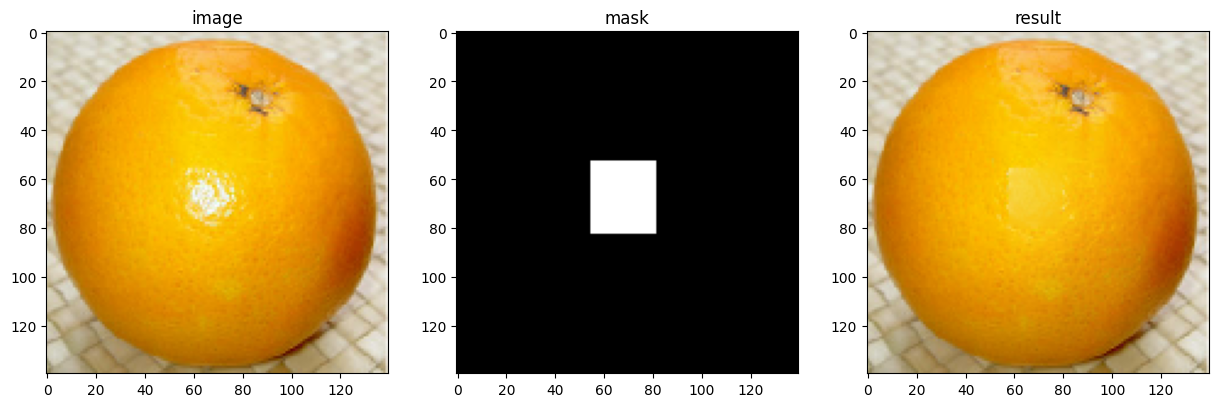

In [31]:
src = cv.imread("D:/test.computer_vision/l2/img/orange.png")
mask = cv.imread("D:/test.computer_vision/l2/img/orange-mask.png") #single channel

result = cv.illuminationChange(src, mask);


plt.figure(figsize=[15,12])
plt.subplot(131);plt.imshow(src[...,::-1]);plt.title("image");
plt.subplot(132);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(133);plt.imshow(result[...,::-1]);plt.title("result");
